In [3]:
import numpy as np

path = "/Users/andy/Desktop/school/2022_fall/机器学习与大数据/project/datasets2022.npz"
data = np.load(path)
X_train = data['train']
y_train = data['label_train']
X_test = data['test']

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=False)

Fontconfig warning: ignoring UTF-8: not a valid region tag


[0 1 1 0 1 0 0 0]


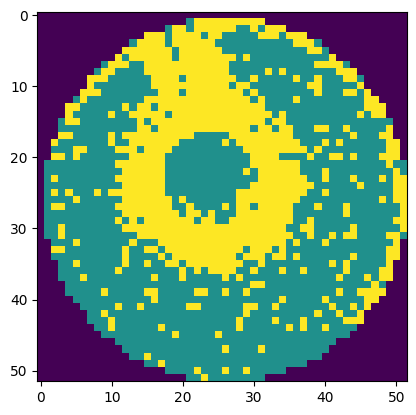

In [4]:
from matplotlib import pyplot as plt

i = 1
print(y_train[i])
plt.imshow(X_train[i])

[0 1 1 0 1 0 0 0]


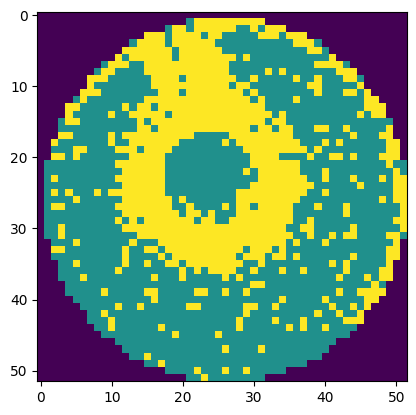

In [5]:
print(y_train[1])
plt.imshow(X_train[1])

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import keras_tuner

ModuleNotFoundError: No module named 'keras'

In [ ]:
from keras import losses

def build_model_tune(hp):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='valid', 
                    input_shape=(52,52,1), data_format='channels_last',
                    activation=hp.Choice('activation_1', ['sigmoid', 'relu', 'tanh'])))
    # model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))  
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='tanh'))  
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="valid", activation='tanh'))  
    model.add(MaxPooling2D(pool_size=(2,2)))  
    model.add(Flatten())  
    model.add(Dense(120, activation='tanh'))
    # model.add(Dropout(hp.Choice('rate', [0., 0.2, 0.3, 0.5])))
    model.add(Dropout(0.2))
    model.add(Dense(84, activation=hp.Choice('activation_2', ['sigmoid', 'tanh'])))   
    # model.add(Dropout(hp.Choice('rate', [0., 0.2, 0.3, 0.5])))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation=hp.Choice('activation_3', ['sigmoid'])))

    model.compile(optimizer="adam",
                              # loss=losses.BinaryCrossentropy(from_logits=True),
                            loss = "binary_crossentropy",
                            metrics=['binary_accuracy'])
    return model

# model = build_model()

tuner = keras_tuner.RandomSearch(
  build_model_tune,
  objective='val_loss',
  max_trials=5, 
  overwrite=True,)

In [ ]:
tuner.search(X_train, y_train, epochs=10, batch_size = 128, validation_data=(X_val, y_val))
best_model = tuner.get_best_models()[0]


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
tanh              |?                 |activation_1
tanh              |?                 |activation_2
sigmoid           |?                 |activation_3

Epoch 1/10
761/761 [==============================] - 22s 28ms/step - loss: 0.2496 - binary_accuracy: 0.8789 - val_loss: 0.1014 - val_binary_accuracy: 0.9650
Epoch 2/10
761/761 [==============================] - 20s 26ms/step - loss: 0.1023 - binary_accuracy: 0.9636 - val_loss: 0.0756 - val_binary_accuracy: 0.9728
Epoch 3/10
761/761 [==============================] - 21s 27ms/step - loss: 0.0767 - binary_accuracy: 0.9742 - val_loss: 0.0614 - val_binary_accuracy: 0.9793
Epoch 4/10
761/761 [==============================] - 20s 27ms/step - loss: 0.0619 - binary_accuracy: 0.9800 - val_loss: 0.0924 - val_binary_accuracy: 0.9669
Epoch 5/10
761/761 [==============================] - 21s 27ms/step - loss: 0.0554 - binary_accuracy: 0.9821 - val_loss: 0.0605 - val_

KeyboardInterrupt: 

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
rate: 0.2
Score: 0.05624009296298027
Trial summary
Hyperparameters:
rate: 0.3
Score: 0.06006881222128868
Trial summary
Hyperparameters:
rate: 0.5
Score: 0.07036300748586655


In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 52, 52, 32)        832       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 26, 26, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 13, 13, 64)        36928     
                                                                 
 conv2d_58 (Conv2D)          (None, 13, 13, 64)      

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', 
                    input_shape=(52,52,1), data_format='channels_last',
                    activation='tanh'))
    # model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))  
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='tanh'))  
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='tanh'))  
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())  
    model.add(Dense(128, activation='tanh'))
    # model.add(Dropout(hp.Choice('rate', [0., 0.2, 0.3, 0.5])))
    model.add(Dropout(0.5))
    model.add(Dense(84, activation='tanh'))
    # model.add(Dropout(hp.Choice('rate', [0., 0.2, 0.3, 0.5])))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='sigmoid'))

    model.compile(optimizer="adam",
                              # loss=losses.BinaryCrossentropy(from_logits=True),
                            loss = "binary_crossentropy",
                            metrics=['binary_accuracy'])
    return model

model = build_model()

In [ ]:
callback = EarlyStopping(monitor="val_loss", patience=3)
model.fit(X_train, y_train, validation_data = [X_val, y_val], batch_size=128, epochs=20, callbacks=callback)

Epoch 1/20
191/191 [==============================] - 29s 150ms/step - loss: 0.3880 - binary_accuracy: 0.7941 - val_loss: 0.3765 - val_binary_accuracy: 0.8194
Epoch 2/20
191/191 [==============================] - 28s 147ms/step - loss: 0.2036 - binary_accuracy: 0.9086 - val_loss: 0.2198 - val_binary_accuracy: 0.9024
Epoch 3/20
191/191 [==============================] - 26s 137ms/step - loss: 0.1380 - binary_accuracy: 0.9475 - val_loss: 0.0844 - val_binary_accuracy: 0.9722
Epoch 4/20
191/191 [==============================] - 27s 140ms/step - loss: 0.0964 - binary_accuracy: 0.9690 - val_loss: 0.0538 - val_binary_accuracy: 0.9833
Epoch 5/20
191/191 [==============================] - 27s 143ms/step - loss: 0.0828 - binary_accuracy: 0.9742 - val_loss: 0.0897 - val_binary_accuracy: 0.9685
Epoch 6/20
191/191 [==============================] - 27s 142ms/step - loss: 0.0673 - binary_accuracy: 0.9807 - val_loss: 0.0483 - val_binary_accuracy: 0.9845
Epoch 7/20
191/191 [==========================

In [ ]:
def plot(n_fig, input):
    rows = int(np.sqrt(n_fig/2))
    cols = (n_fig-1)//rows + 1
    fig, ax = plt.subplots(rows,cols, figsize=(12,8))

    for i in range(rows):
        for j in range(cols):
            if i*cols + j > n_fig-1:
                break
            ax[i,j].imshow(input[0,:,:,i*rows + j])

tf.Tensor(
[[ 0.27930358  0.5415783  -0.94775784 ...  0.2814318   0.8872991
   0.10077575]], shape=(1, 1152), dtype=float32)
tf.Tensor(
[[-0.9946588   0.9999993   0.99992996 -0.9999991   0.9918085   0.6899381
  -0.926674   -0.99999976 -0.9999347  -0.9830017   0.99646777  0.9997684
  -0.9999908   0.7491429  -0.9999883   0.9994892  -0.9976456  -0.99688494
   0.9322003   0.9979822  -0.9999684  -0.87799585  0.99994224 -0.9981108
  -0.9999734   0.9999983   0.84124243  0.99862975  0.999997    0.9270149
  -0.81162834 -0.9784231   0.72958446 -0.9570317  -0.00605504 -0.9999883
   0.998971   -0.9315201   0.9901684   0.9999992   0.9970352   0.9964196
   0.99999917 -0.96828836  0.99900216 -0.9723552   0.99989074  0.99987376
   0.99996907  0.9999992  -0.99288857 -0.99999976 -0.99999917 -0.91446376
  -0.99485415  0.9098909   0.99999976 -0.99704343 -0.9994514  -0.99999976
  -0.99999607  0.9999614   0.9816661   0.98538166  0.99380434 -0.96277344
   0.9997493  -0.6795666  -0.71792686  0.91310537 -0.999

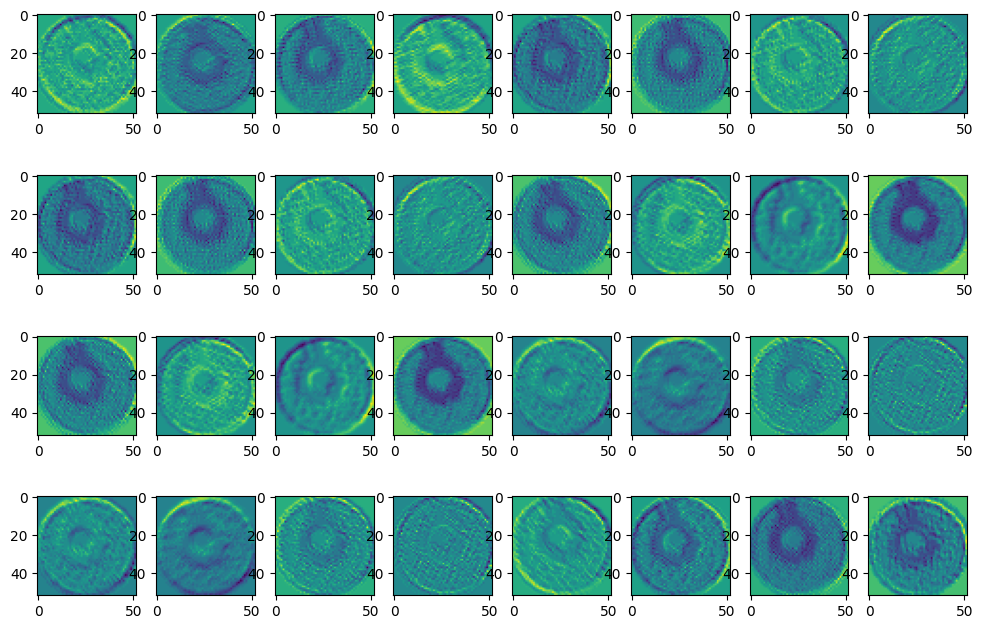

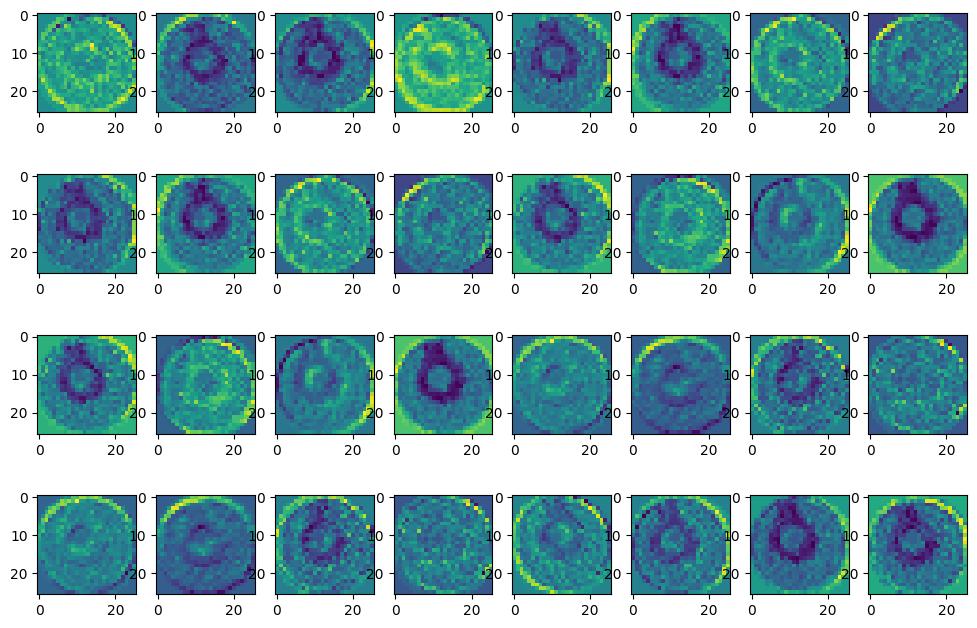

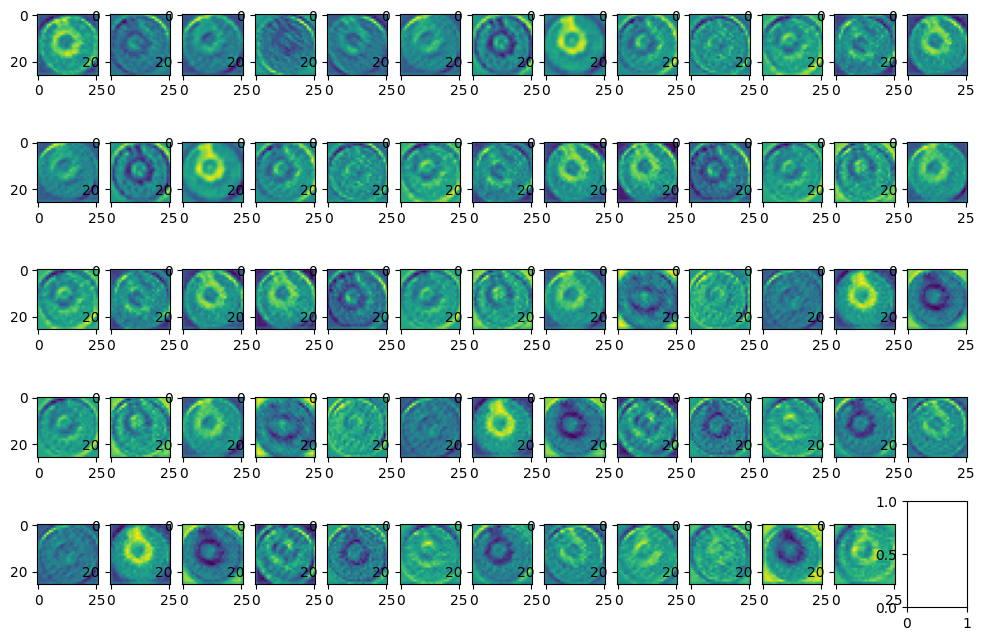

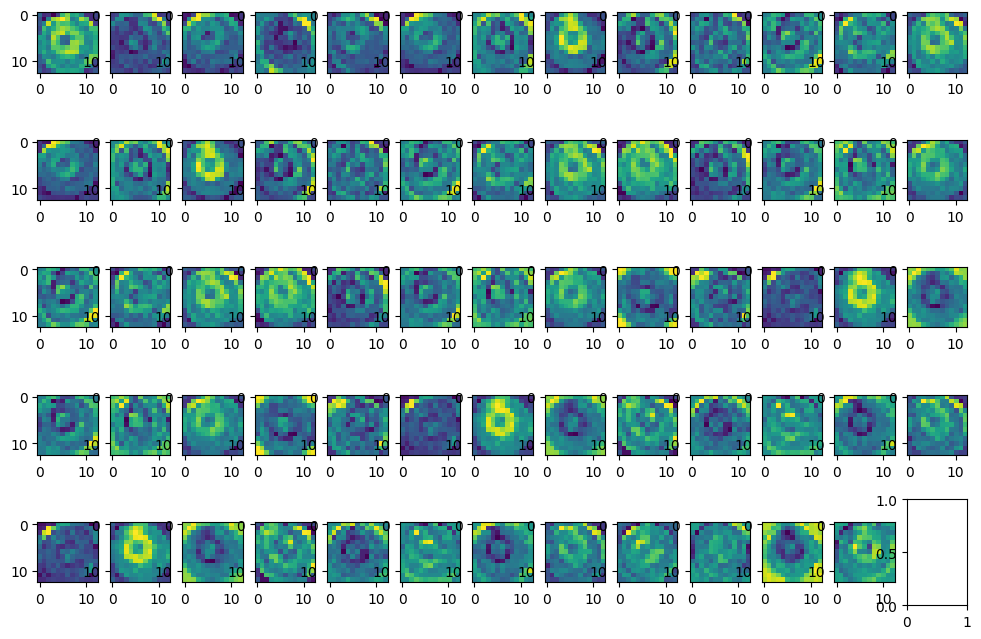

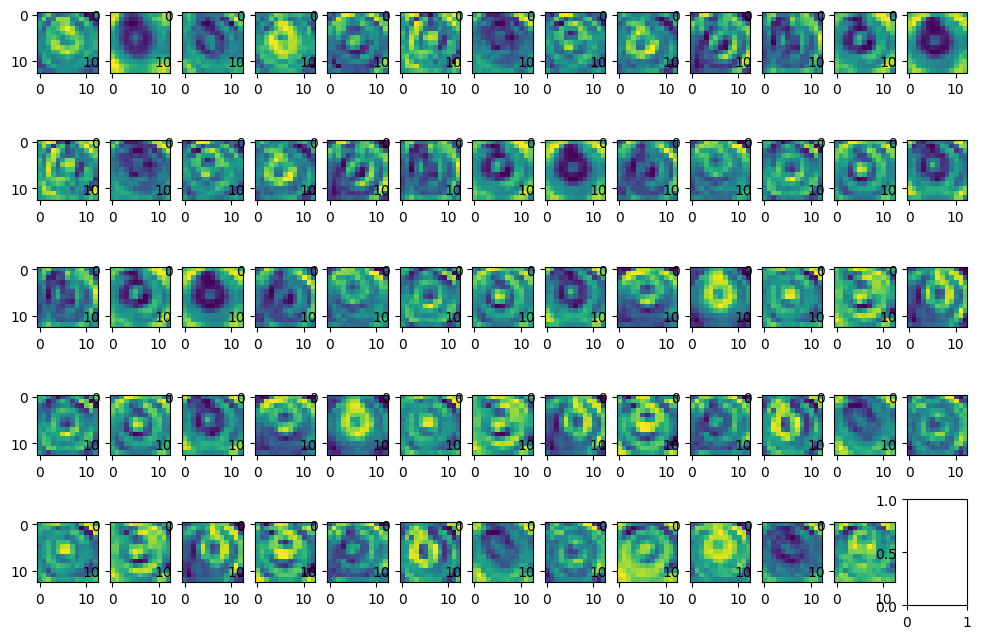

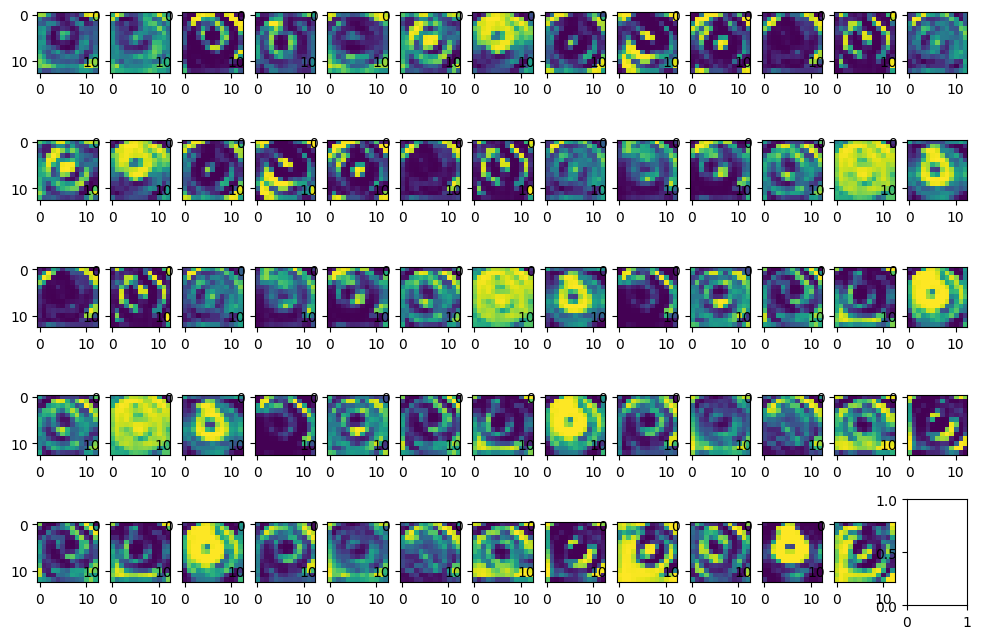

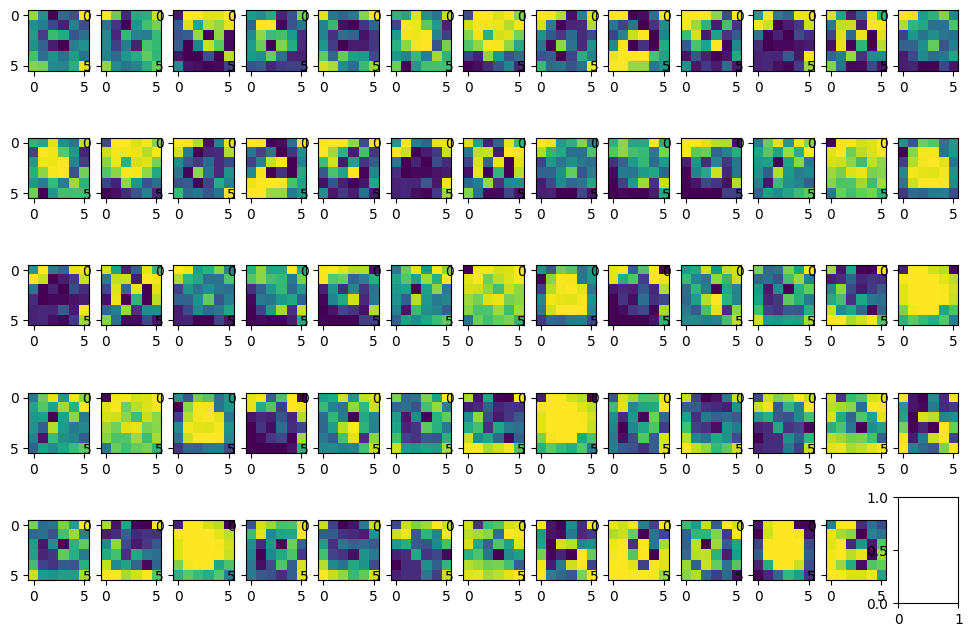

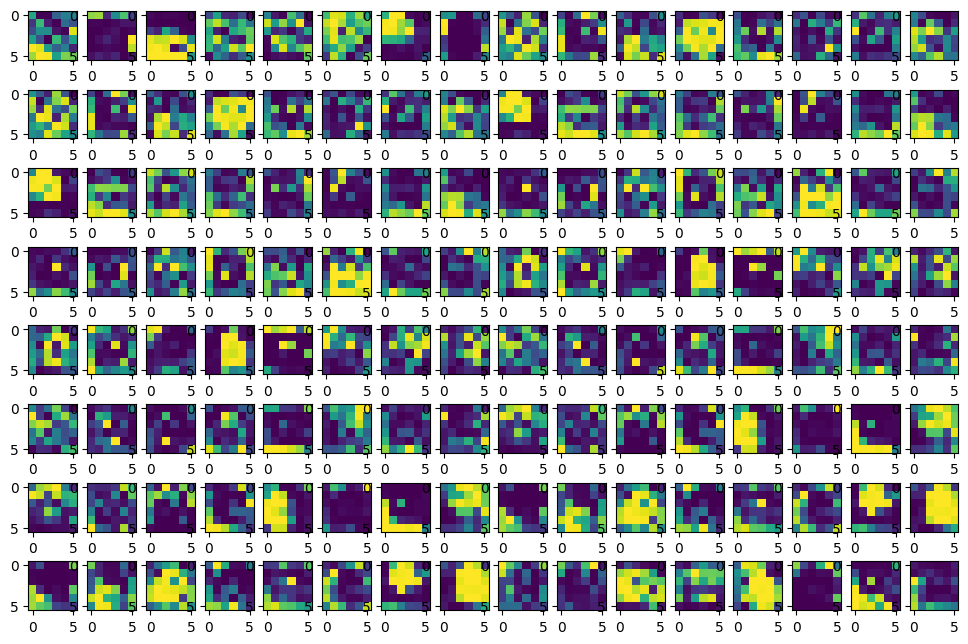

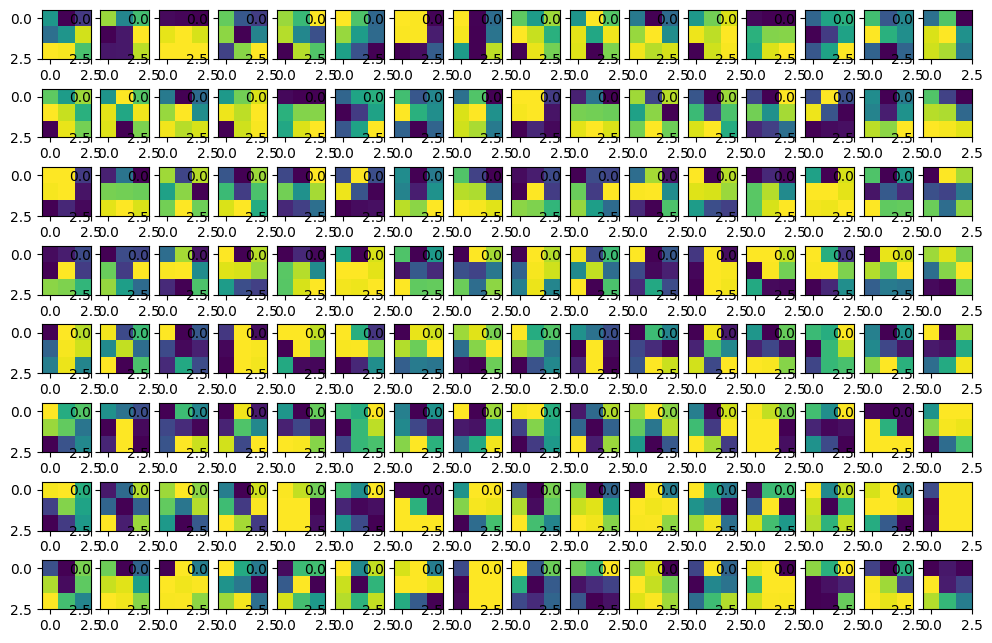

In [ ]:
i = 1
input = X_train[i:i+1]
for layer in model.layers:
    input = layer(input)
    if len(layer.output_shape) == 4:
        n_fig = layer.output_shape[-1]
        plot(n_fig, input)
    else:
        print(input)
    

In [ ]:
# model = best_model

pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

191/191 [==============================] - 2s 11ms/step


In [ ]:
correct = 0

for yhat, y in zip(np.round(pred_train), y_train):
    correct += (yhat == y).all()

correct/len(y_train)

0.9838464384068396

In [ ]:
correct = 0

for yhat, y in zip(np.round(pred_val), y_val):
    correct += (yhat == y).all()
    

correct/len(y_val)

0.9584086799276673

In [ ]:
((np.round(pred_train) + y_train) % 2).sum(axis=0)

array([ 20.,  17., 321., 198., 108.,   8., 390.,  11.])

In [ ]:
from sklearn.metrics import hamming_loss
hamming_loss(np.round(pred_val), y_val)

0.006472957422324511

102:  [1 0 1 0 1 0 1 0] 
    [1 0 0 1 1 0 1 0] 
    [1.   0.   0.01 0.99 1.   0.   1.   0.  ]
210:  [0 0 0 0 1 0 0 0] 
    [0 0 0 0 0 0 0 0] 
    [0.   0.   0.03 0.   0.02 0.   0.   0.  ]
264:  [0 1 0 1 0 0 1 0] 
    [0 1 0 1 1 0 1 0] 
    [0.   1.   0.01 1.   0.65 0.   1.   0.  ]
309:  [0 0 0 0 1 0 0 0] 
    [0 0 0 0 1 0 1 0] 
    [0.   0.   0.02 0.   1.   0.   0.51 0.  ]
469:  [0 1 1 0 1 0 0 0] 
    [0 1 1 0 0 0 0 0] 
    [0.   1.   1.   0.   0.14 0.   0.   0.  ]
522:  [0 0 1 0 1 0 0 0] 
    [0 0 0 0 1 0 0 0] 
    [0.  0.  0.3 0.  1.  0.  0.  0. ]
533:  [1 0 1 0 1 0 0 0] 
    [1 0 1 0 0 0 0 0] 
    [1. 0. 1. 0. 0. 0. 0. 0.]
569:  [0 0 1 0 1 0 1 0] 
    [0 0 0 0 1 0 1 0] 
    [0.   0.   0.01 0.   1.   0.   1.   0.  ]
598:  [1 0 1 0 1 0 0 0] 
    [1 0 1 0 0 0 0 0] 
    [1.   0.   1.   0.   0.01 0.   0.   0.  ]
623:  [0 1 1 0 1 0 0 0] 
    [0 1 1 0 1 0 1 0] 
    [0.   1.   1.   0.   0.99 0.   0.61 0.  ]


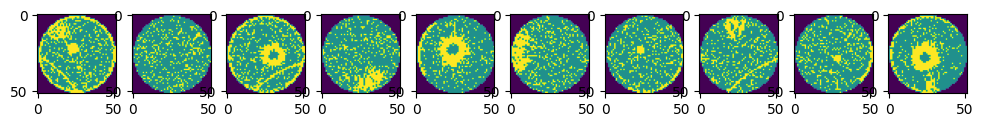

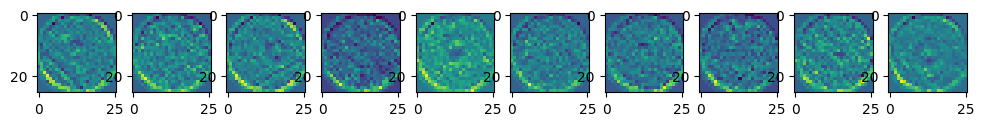

In [ ]:
all_correct = (np.round(pred_train) == y_train).all(axis=1)
counter = 0
fig, ax = plt.subplots(1,10, figsize=(12,8))
_, ax2 = plt.subplots(1,10, figsize=(12,8))
layer1, layer2 = model.layers[0:2]

for i, c in enumerate(all_correct):
    if not c:
        ax[counter].imshow(X_train[i])
        ax2[counter].imshow(layer2(layer1(X_train[i:i+1]))[0,:,:,0])
        print("{}: ".format(i), y_train[i], "\n   ", np.round(pred_train[i]).astype(int),"\n   ", np.round(pred_train[i],2))
        counter += 1
    if counter == 10:
        break

In [ ]:
print(y_train[:10])

[[0 0 0 1 0 0 0 0]
 [0 1 1 0 1 0 0 0]
 [1 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 1 0]
 [0 0 1 0 1 0 1 0]
 [0 1 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0]]


In [ ]:
import numpy as np

In [ ]:
W = np.array([[0.58, 0.24],
              [0.24, 0.72]])

U = np.array([[0.5, 0, 0, 0],
              [0  , 0, 0, 0]])

V = U.transpose()

C = [0, 0, 0, 1]

In [ ]:
def tanh(matrix):
    return (np.exp(matrix)-np.exp(-matrix))/(np.exp(matrix)+np.exp(-matrix))

def softmax(matrix):
    return np.exp(matrix)/sum(np.exp(matrix))

h = np.array([1,0,0,0])
e = np.array([0,1,0,0])
l = np.array([0,0,1,0])
o = np.array([0,0,0,1])

In [ ]:
h0 = np.array([0, 0])
a1 = np.dot(W, h0) + np.dot(U, h)
h1 = tanh(a1)
o1 = C + np.dot(V, h1)
print("a1: ", a1, "\nh1: ", h1, "\no1: ", o1)

a1:  [0.5 0. ] 
h1:  [0.46211716 0.        ] 
o1:  [0.23105858 0.         0.         1.        ]


In [ ]:
a2 = np.dot(W, h1) + np.dot(U, e)
h2 = tanh(a2)
o2 = C + np.dot(V, h2)
print("a2: ", a2, "\nh2: ", h2, "\no2: ", o2)

a2:  [0.26802795 0.11090812] 
h2:  [0.26178889 0.1104556 ] 
o2:  [0.13089444 0.         0.         1.        ]


In [ ]:
a3 = np.dot(W, h2) + np.dot(U, l)
h3 = tanh(a3)
o3 = C + np.dot(V, h3)
print("a3: ", a3, "\nh3: ", h3, "\no3: ", o3)

a3:  [0.1783469  0.14235736] 
h3:  [0.17647972 0.14140344] 
o3:  [0.08823986 0.         0.         1.        ]


In [ ]:
a4 = np.dot(W, h3) + np.dot(U, l)
h4 = tanh(a4)
o4 = C + np.dot(V, h4)
print("a4: ", a4, "\nh4: ", h4, "\no4: ", o4)

a4:  [0.13629506 0.14416561] 
h4:  [0.13545733 0.14317508] 
o4:  [0.06772867 0.         0.         1.        ]


In [ ]:
yhat = softmax(o4)
yhat

array([0.18486679, 0.1727606 , 0.1727606 , 0.46961201])

In [ ]:
W**30

array([[7.99539284e-08, 2.54880876e-19],
       [2.54880876e-19, 5.24777121e-05]])